# VERİYE İLK BAKIŞ
    Veri Seti hikayesi ve yapısının incelenmesi

In [32]:
import seaborn as sns

In [33]:
planets = sns.load_dataset("planets")

In [46]:
df = planets.copy()

     -Bu kısımda planets adlı veri setini çalışmamıza dahil ettik.
    Bu veri seti NASA'nın yayınladığı galaksi keşfi ile ilgili bir veri setidir. Burdaki method galaksilerin bulunma şeklini ifade etmektedir.
    
    orbital_periyod = periyotlar
    number = gezegen ve ya galaksi sayıları
    mass = kütle 
    distance = uzaklık
    year = yıl

In [45]:
df = planets.copy 

In [47]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [48]:
df.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


In [49]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [50]:
df.shape   #değişken ve gözlem sayısına erişmek için 

(1035, 6)

In [51]:
df.columns #değişken ve gözlem isimlerine  erişmek için 

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [52]:
df.describe().T  #Betimsel istatistikler. Eksik değerleri şimdilik gözardı etmek için transpozunu aldık

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [ ]:
# eksik değerleri inceleyelim

In [54]:
#Hiç eksik gözlem var mı?
df.isnull().values.any()

True

In [55]:
#Hangi değişkende kaçar tane var?
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

Sadece Kategorik Değişkenler

In [56]:
kat_df = df.select_dtypes (include =["object"]) #dataframe içerisinden istediğimiz tipe göre değişken seçmek için kullanılır

In [57]:
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


Seçmiş olduğumuz kategorik değişkenin sınıflarına ve sınıf sayısına erişelim

In [58]:
kat_df.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [59]:
kat_df["method"].value_counts().count()

10

Seçmiş olduğumuz kategorik değişkenin frekanslarına  erişelim

In [60]:
kat_df["method"].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

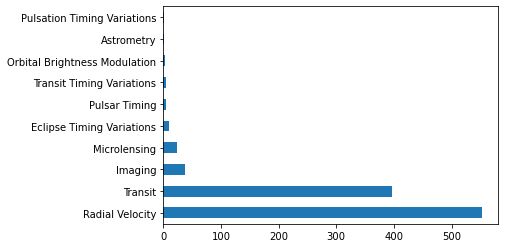

In [62]:
df["method"].value_counts().plot.barh();

In [1]:
import seaborn as sns

In [2]:
planets = sns.load_dataset("planets")

In [3]:
df = planets.copy()

In [4]:
#ordinal tanımlama
from pandas.api.types import CategoricalDtype


In [17]:
kat_df = df.select_dtypes (include =["object"])
cut_kategoriler = ["method","number","orbital_period","mass","distance","year"]

In [18]:
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


In [19]:
kat_df = kat_df.astype(CategoricalDtype(ordered = True))

In [20]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

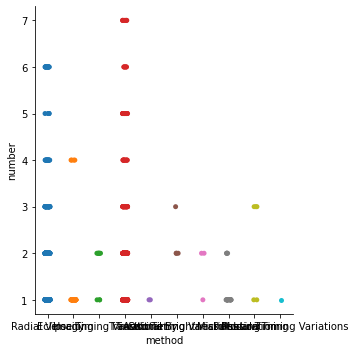

In [30]:
sns.catplot( x= "method" , y="number", data = df );

In [31]:
df.groupby(["method","mass"]).mean()

number  orbital_period  distance    year
method                    mass                                              
Eclipse Timing Variations 4.20000      1.0      4343.50000       NaN  2012.0
                          6.05000      1.0     10220.00000       NaN  2009.0
Radial Velocity           0.00360      1.0         3.23570      1.35  2012.0
                          0.00600      4.0         3.14942      6.27  2005.0
                          0.00755      3.0        40.11400      6.06  2011.0
...                                    ...             ...       ...     ...
                          19.80000     1.0       677.80000       NaN  2007.0
                          20.60000     1.0       305.50000     92.51  2013.0
                          21.42000     2.0       379.63000       NaN  2009.0
                          25.00000     1.0      2371.00000     37.05  2008.0
Transit                   1.47000      1.0         2.70339    178.00  2013.0

[382 rows x 4 columns]

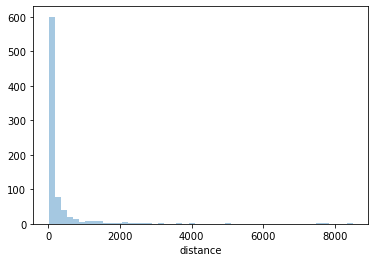

In [35]:
sns.distplot(df.distance , kde= False);

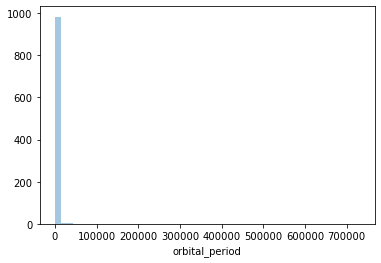

In [36]:
sns.distplot(df.orbital_period , kde= False);

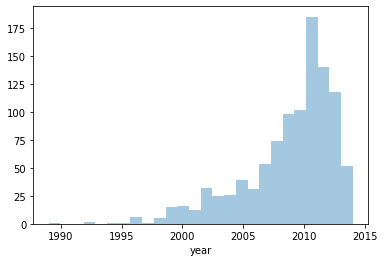

In [37]:
sns.distplot(df.year , kde= False);

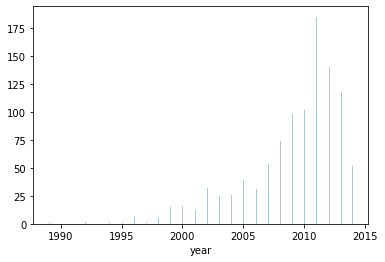

In [42]:
sns.distplot(df.year , bins = 300 , kde= False);

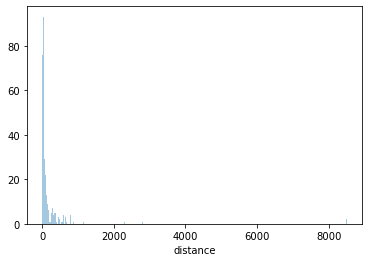

In [47]:
sns.distplot(df.distance , bins = 1000 , kde= False);

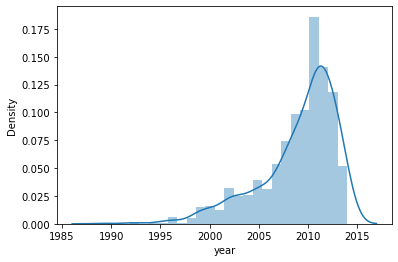

In [48]:
sns.distplot(df.year ); #yoğunluk grafiği

C:\Users\FARUK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


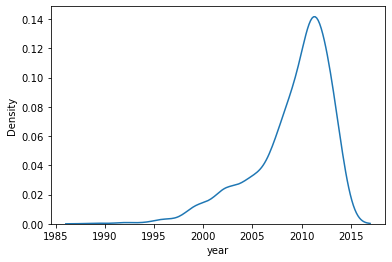

In [54]:
sns.distplot(df.year , hist= False);

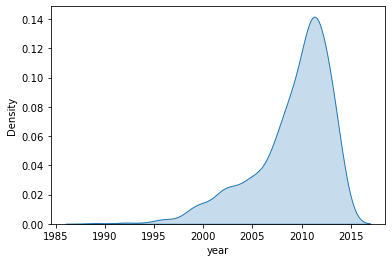

In [52]:
sns.kdeplot(df.year, shade = True) ;

C:\Users\FARUK\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\FARUK\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


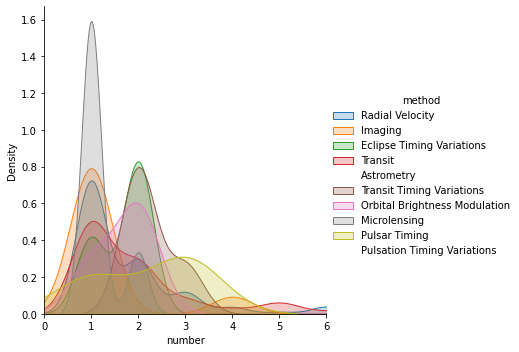

In [81]:
(sns
 .FacetGrid(df,
             hue = "method",
             height = 5,
             xlim  = (0,6))
.map(sns.kdeplot, "number" , shade = True )
.add_legend()

);

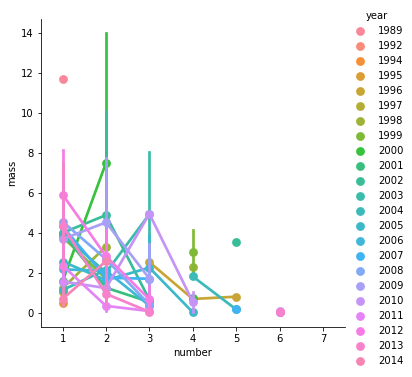

In [91]:
sns.catplot(x ="number", y="mass" , hue = "year" , kind ="point", data=df);

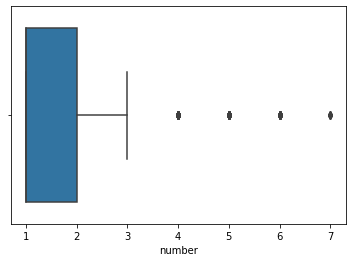

In [93]:
sns.boxplot(x = df["number"]);

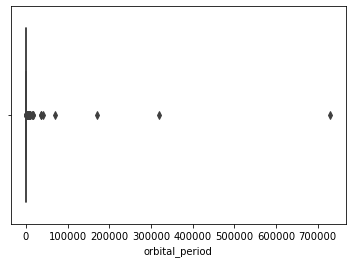

In [94]:
sns.boxplot(x = df["orbital_period"]);

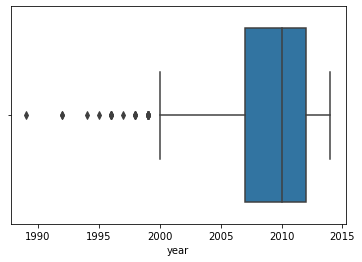

In [96]:
sns.boxplot(x = df["year"]);

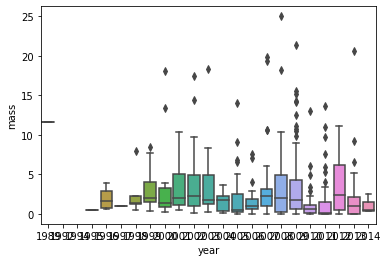

In [104]:
sns.boxplot(x ="year" , y="mass", data=df);

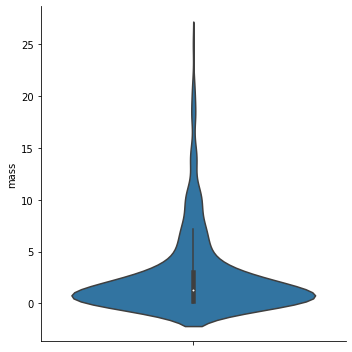

In [105]:
#Violin grafik oluşturmak için
sns.catplot(y="mass" , kind ="violin" , data = df);

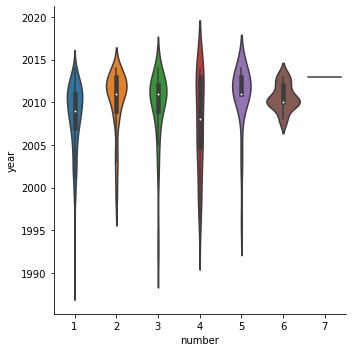

In [109]:
sns.catplot(x= "number" , y= "year" , kind = "violin" , data = df);

In [17]:
#KORELASYON GRAFİKLERİ
import seaborn as sns
import matplotlib.pyplot as plp
planets = sns.load_dataset("planets")
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


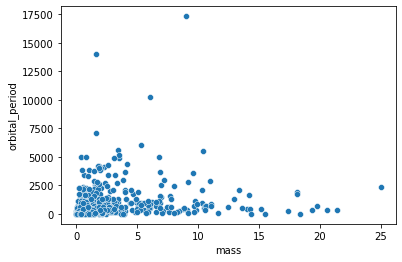

In [11]:
sns.scatterplot(x ="mass" , y ="orbital_period" , data = df);

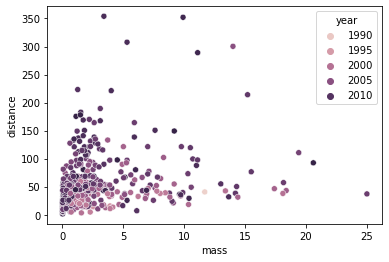

In [15]:
sns.scatterplot(x ="mass" , y ="distance" , hue ="year", data = df);

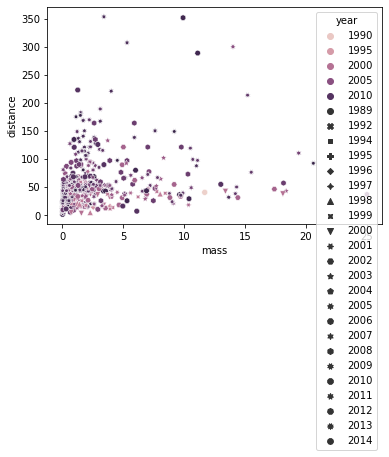

In [16]:
sns.scatterplot(x ="mass" , y ="distance" , hue ="year", style ="year" , data = df);

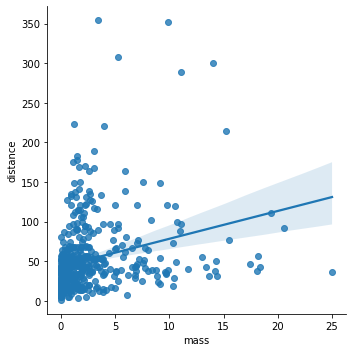

In [18]:
sns.lmplot(x="mass", y ="distance", data =df);

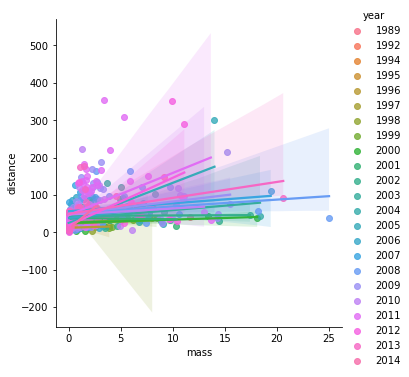

In [24]:
sns.lmplot(x="mass", y ="distance",  hue ="year" , data =df);

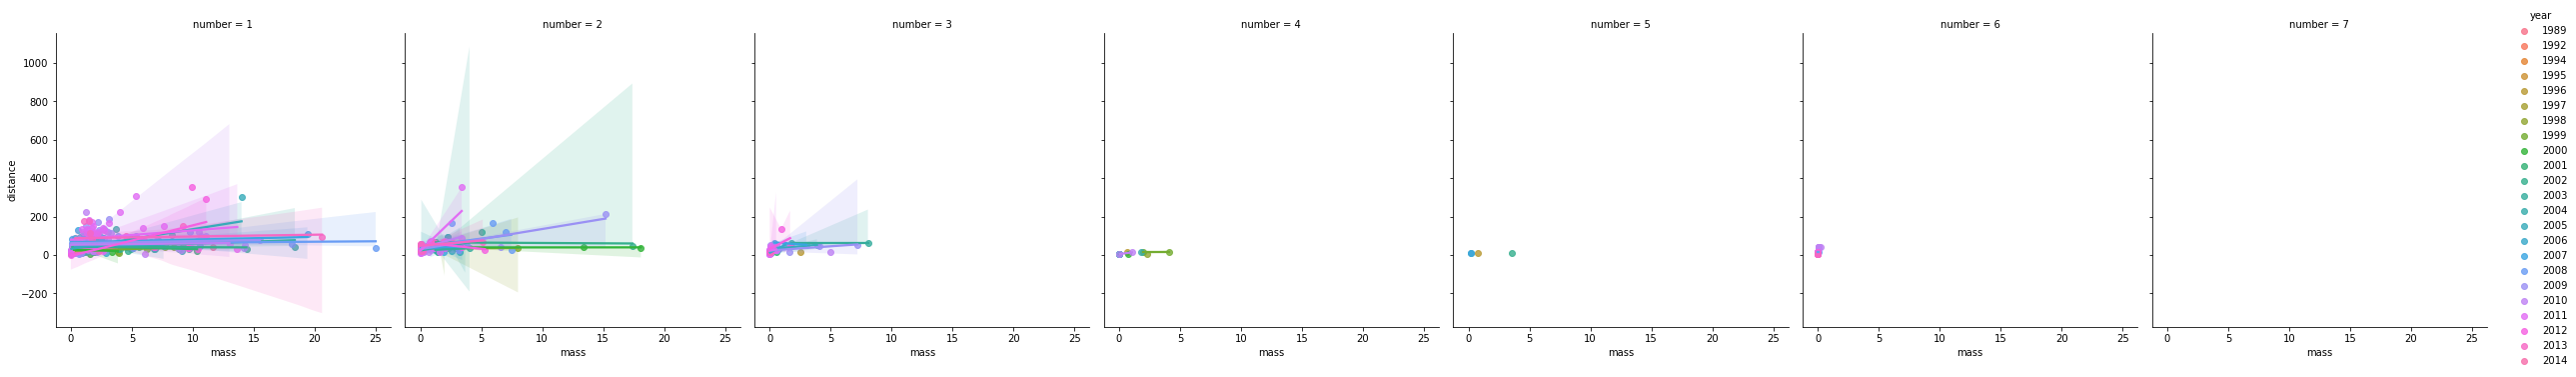

In [26]:
sns.lmplot(x="mass", y ="distance",  hue ="year" , col="number", data =df);

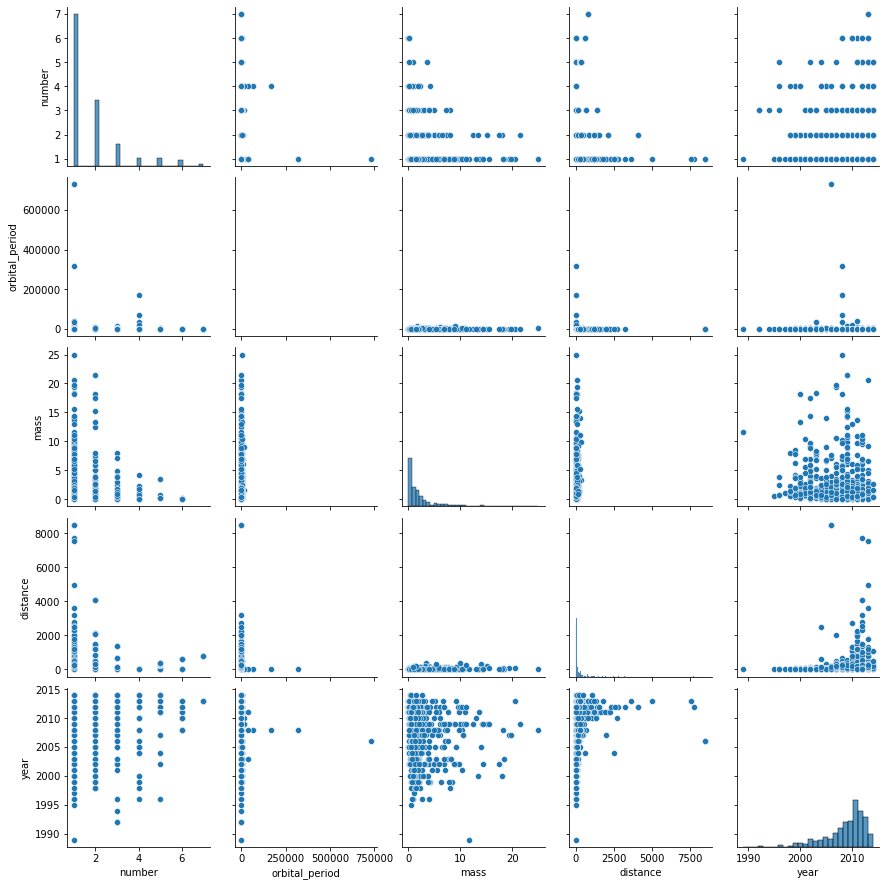

In [27]:
sns.pairplot(df);

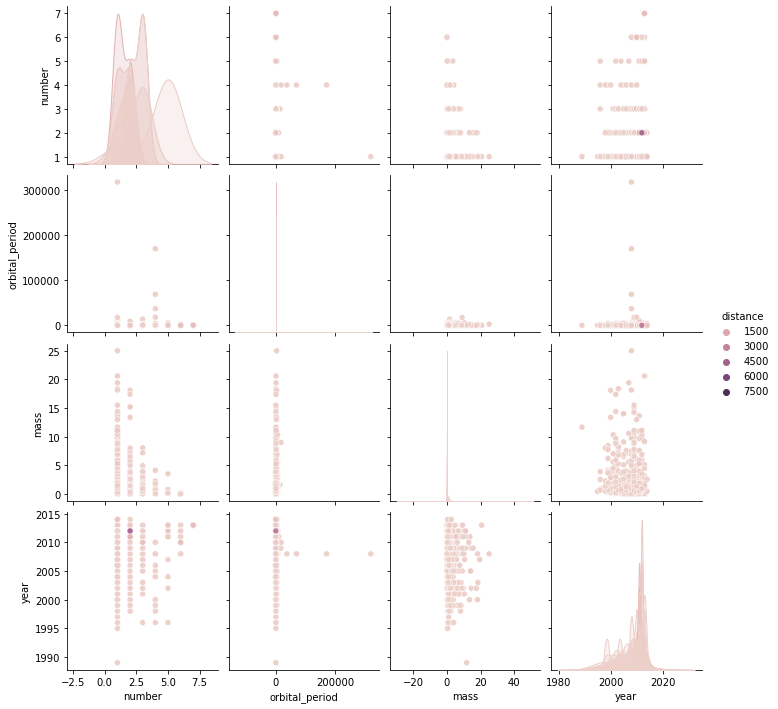

In [34]:
sns.pairplot(df , hue = "distance");